In [4]:
# import data in
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/vrose99/Assignment7temp/main/shhs.txt"
s=requests.get(url).content
raw_data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [10]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression
 
X = raw_data.iloc[:, 30].values.reshape(-1, 1)  # values converts it into a numpy array
Y = raw_data.iloc[:, 11].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


In [75]:
def try_float(x):
    try:
        float(x)
        return True
    except:
        return False
x_ref = np.ones((len(X)), dtype=bool)
y_ref = np.ones((len(Y)), dtype=bool)

for i in range(0,len(X)):
  x_ref[i] = try_float(X[i])
  y_ref[i] = try_float(Y[i])

X_new = X[x_ref & y_ref]
Y_new = Y[x_ref & y_ref]

X_new = X_new.astype(float)
Y_new = Y_new.astype(float)
Y_new = np.log(Y_new + 1)

In [76]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_new, Y_new)  # perform linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

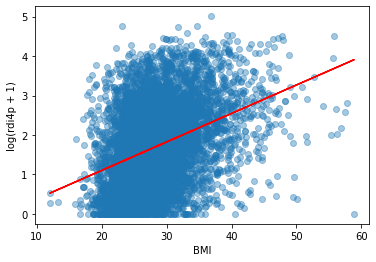

In [85]:
Y_pred = linear_regressor.predict(X_new)  # make predictions
plt.scatter(X_new, Y_new, alpha=0.4)
plt.plot(X_new, Y_pred, color='red')
plt.xlabel('BMI')
plt.ylabel('log(rdi4p + 1)')
plt.show()

In [77]:
print(linear_regressor.intercept_)

[-0.34302444]


In [78]:
print(linear_regressor.coef_)

[[0.07221164]]


In [79]:
prediction_30 = linear_regressor.predict([[30]])
prediction_30

array([[1.82332484]])